In [0]:
import tensorflow as tf

from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

4423680/4422102 [==============================] - 1s 0us/step
x_train.shape: (60000, 28, 28)


In [3]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [8]:
K = len(set(y_train))
print("Clases:", K)

Clases: 10
h


In [14]:
i = Input(shape=(28,28))
x = LSTM(128)(i)
x = Dense(K,activation='softmax')(x)

model = Model(i,x)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

m = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5744 - accuracy: 0.7881 - val_loss: 0.4544 - val_accuracy: 0.8328
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4010 - accuracy: 0.8518 - val_loss: 0.4011 - val_accuracy: 0.8486
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3549 - accuracy: 0.8678 - val_loss: 0.3734 - val_accuracy: 0.8592
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3253 - accuracy: 0.8795 - val_loss: 0.3486 - val_accuracy: 0.8715
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3055 - accuracy: 0.8861 - val_loss: 0.3320 - val_accuracy: 0.8799
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2874 - accuracy: 0.8939 - val_loss: 0.3096 - val_accuracy: 0.8836
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2725 - accuracy: 0.8981 - val_loss: 0.3147 - val_accuracy:

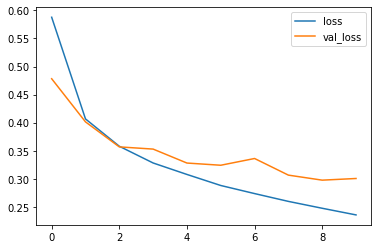

In [15]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

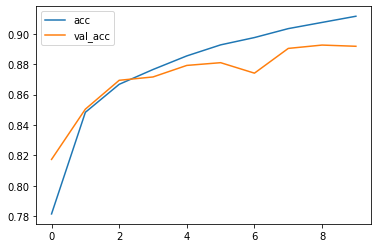

In [16]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[834   2  11  30   1   0 111   1  10   0]
 [  3 975   1  16   2   0   1   0   2   0]
 [ 16   0 800  14  89   0  79   0   2   0]
 [ 16   6  10 914  33   0  19   0   2   0]
 [  0   0  75  37 836   0  51   0   1   0]
 [  0   0   0   1   0 956   0  30   1  12]
 [108   3  58  37  92   0 687   0  15   0]
 [  0   0   0   0   0   4   0 981   0  15]
 [  1   0   2   7   1   1   0   2 985   1]
 [  0   0   0   0   0   4   1  38   0 957]]


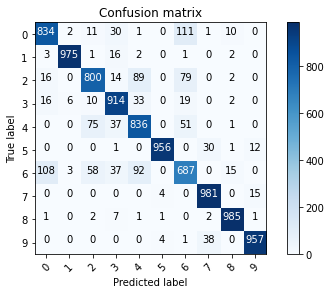

In [17]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

#Esperaba mejores resultados honestamente